In [3]:
#Importing modules
from sklearn import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#import data
well = pd.read_csv('https://raw.githubusercontent.com/iqbalridalta/oilrate/main/Well0%20-%20Test.csv')

In [36]:
#see the data in 5 row
well.head()

,well,zone,top_perfo,bot_perfo,h(m),porosity,permeability,sw,actual_rate
0,A11,PHO-143,861.0,865.0,4.0,0.148,33.00,63.0,250.0
1,A12,PHO-143,888.5,892.0,3.5,0.190,27.90,57.8,250.0
2,B11,D-5b,695.0,698.0,3.0,0.140,5.22,46.0,NaN
3,B11,C-O33,534.0,536.0,2.0,0.240,172.95,39.0,187.0
4,B12,D-O5,674.0,682.0,8.0,0.230,96.60,32.0,200.0


In [7]:
type(well)

pandas.core.frame.DataFrame

In [8]:
print(plt.style.available)
plt.style.use('ggplot')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [9]:
well.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
well            41 non-null object
zone            41 non-null object
top_perfo       41 non-null float64
bot_perfo       41 non-null float64
h(m)            40 non-null float64
porosity        41 non-null float64
permeability    41 non-null float64
sw              41 non-null float64
actual_rate     32 non-null float64
dtypes: float64(7), object(2)
memory usage: 3.0+ KB


In [22]:
well_origin = pd.get_dummies(well)

In [37]:
#checkout missing value
print(well.isnull().sum())
print(well[well['h(m)'].isnull()])
print(well[well['actual_rate'].isnull()])

well            0
zone            0
top_perfo       0
bot_perfo       0
h(m)            1
porosity        0
permeability    0
sw              0
actual_rate     9
dtype: int64
   well zone  top_perfo  bot_perfo  h(m)  porosity  permeability    sw  \
40  G11   G1      342.0      357.0   NaN      0.29         196.0  41.0   

    actual_rate  
40         24.0  
   well   zone  top_perfo  bot_perfo  h(m)  porosity  permeability    sw  \
2   B11   D-5b      695.0      698.0   3.0     0.140          5.22  46.0   
6   B14  D-Olb      829.0      833.0   4.0     0.210         40.00  74.0   
8   B16  D-Olb      833.0      837.0   4.0     0.210         40.00  74.0   
9   B17  D-053      877.0      880.0   3.0     0.169          3.78  63.2   
12  C10   D-06      678.0      681.0   3.0     0.190         14.00  60.0   
13  C10   D-19     1157.0     1164.0   7.0     0.240        200.00  50.0   
17  C13   D-14     1154.0     1163.0   9.0     0.150          5.00  92.0   
26  D16  C-O33     1133.0     11

In [38]:
#imputing data with mean method
from sklearn.impute import SimpleImputer
numeric_columns = well.select_dtypes(include='number').columns
imp = SimpleImputer (missing_values = np.nan, strategy = 'mean')
well[numeric_columns] = pd.DataFrame(imp.fit_transform(well[numeric_columns]), columns=numeric_columns)

In [39]:
print(well)

   well     zone  top_perfo  bot_perfo     h(m)  porosity  permeability    sw  \
0   A11  PHO-143      861.0      865.0   4.0000     0.148         33.00  63.0   
1   A12  PHO-143      888.5      892.0   3.5000     0.190         27.90  57.8   
2   B11     D-5b      695.0      698.0   3.0000     0.140          5.22  46.0   
3   B11    C-O33      534.0      536.0   2.0000     0.240        172.95  39.0   
4   B12     D-O5      674.0      682.0   8.0000     0.230         96.60  32.0   
5   B13     C-Ol      485.0      487.0   2.0000     0.280        100.00  80.0   
6   B14    D-Olb      829.0      833.0   4.0000     0.210         40.00  74.0   
7   B15    D-04c      920.0      924.0   4.0000     0.172         20.00  73.0   
8   B16    D-Olb      833.0      837.0   4.0000     0.210         40.00  74.0   
9   B17    D-053      877.0      880.0   3.0000     0.169          3.78  63.2   
10  B18     D-OS      942.0      950.0   8.0000     0.206         30.80  53.0   
11  C10     D-09      829.0 

In [40]:
#importing data for KNN
X = well.drop(well.columns[[0,1,2,3,8]], axis = 1).values
y = well['actual_rate'].values

In [11]:
#X_train = well.drop(well.columns[[0,1,2,3,8,9]], axis = 1).values
#y_train = well['actual_rate'].values
#X_test = well.drop(well.columns[[0,1,2,3,8,9]], axis = 1).values
#y_test = well['actual_rate'].values

In [41]:
#initialize knn, train_test_split and mean_squared error

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 42)

knn = neighbors.KNeighborsRegressor(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(X_test)
print(y_pred)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

[[4.0000e+00 2.7000e-01 1.8000e+02 5.8000e+01]
 [7.0000e+00 2.4000e-01 2.0000e+02 5.0000e+01]
 [4.0000e+00 2.1000e-01 4.0000e+01 7.4000e+01]
 [2.0000e+00 2.1000e-01 7.1000e+01 7.0000e+01]
 [8.0000e+00 2.3000e-01 9.6600e+01 3.2000e+01]
 [4.6825e+00 2.9000e-01 1.9600e+02 4.1000e+01]
 [4.5000e+00 1.8000e-01 1.0000e+01 6.5000e+01]
 [1.3000e+00 2.4000e-01 1.0800e+02 3.2000e+01]
 [2.0000e+00 2.5000e-01 9.0000e+01 6.0000e+01]
 [4.0000e+00 2.1000e-01 4.0000e+01 7.4000e+01]
 [3.0000e+00 2.7300e-01 4.0600e+02 2.1000e+01]
 [3.0000e+00 1.9000e-01 1.4000e+01 6.0000e+01]
 [9.0000e+00 1.5000e-01 5.0000e+00 9.2000e+01]]
[187. 250. 150. 250. 200. 250. 250. 200. 250. 150. 350. 200. 250.]
97.63289759250051


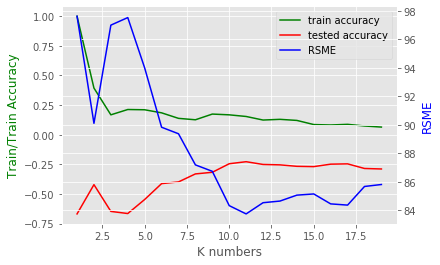

In [43]:
#determining optimum k

k_numbers = np.arange(1,20)
train_accuracy = np.empty (len(k_numbers))
test_accuracy = np.empty(len(k_numbers))
rsme = np.empty(len(k_numbers))

for i, k in enumerate (k_numbers):
    
    knn_test = neighbors.KNeighborsRegressor(n_neighbors = k)
    
    knn_test.fit(X_train, y_train)
    y_pred = knn_test.predict(X_test)
    
    train_accuracy[i] = knn_test.score(X_train, y_train)
    test_accuracy[i] = knn_test.score(X_test, y_test)
    rsme[i] = np.sqrt(mean_squared_error(y_test, y_pred))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
l1, =ax1.plot(k_numbers, train_accuracy, 'g-')
l2, =ax1.plot(k_numbers, test_accuracy, 'r-')
l3, =ax2.plot(k_numbers, rsme , 'b-')

ax1.set_xlabel('K numbers')
ax1.set_ylabel('Train/Train Accuracy', color='g')
ax2.set_ylabel('RSME', color='b')

ax1.legend((l1, l2, l3), ('train accuracy', 'tested accuracy', 'RSME'), loc='upper right')

plt.show()

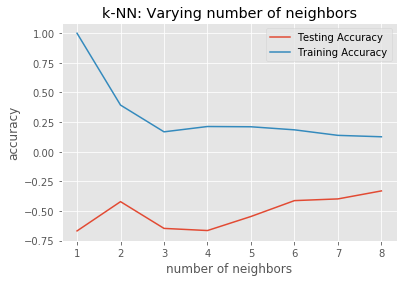

In [44]:
#analyzing optimum k

k_numbers = np.arange(1,9)
train_accuracy = np.empty (len(k_numbers))
test_accuracy = np.empty(len(k_numbers))
rsme = np.empty(len(k_numbers))

for i, k in enumerate (k_numbers):
    
    knn_test = neighbors.KNeighborsRegressor(n_neighbors = k)
    
    knn_test.fit(X_train, y_train)
    y_pred = knn_test.predict(X_test)
    
    train_accuracy[i] = knn_test.score(X_train, y_train)
    test_accuracy[i] = knn_test.score(X_test, y_test)
    rsme[i] = np.sqrt(mean_squared_error(y_test, y_pred))
    
plt.title ('k-NN: Varying number of neighbors')
plt.plot(k_numbers, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_numbers, train_accuracy, label = 'Training Accuracy')

plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
           
plt.show()

In [55]:
#apply model to the entire dataset
from sklearn.metrics import mean_squared_error

knn.fit(X_train, y_train)
y_pred = knn.predict(X)
rsme = mean_squared_error(y, y_pred)
pred = pd.DataFrame(y_pred)
pred.columns = ['prediction rate']
df = pd.concat([well, pred], axis = 1)
df.to_csv('prediction_basic.csv')
print(mean_squared_error(y, y_pred)**0.5)

54.97635300967046


In [45]:
#cross val
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(knn, X, y, cv=5)
print(cv_results)
print(np.mean(cv_results))

[-23.51337575 -69.46586472  -1.64405273  -0.26032585  -2.03165739]
-19.383055289103027


In [31]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': np.arange(1, 30)}
knn = neighbors.KNeighborsRegressor()

knn_cv = GridSearchCV(knn, params, cv=5)
knn_cv.fit(X, y)
knn_cv.best_params_
print(knn_cv.best_params_)
knn_cv.best_score_
print(knn_cv.best_score_)

{'n_neighbors': 26}
-1.156789189465751


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

steps = [('scaler', StandardScaler()),('knn', neighbors.KNeighborsRegressor())]
                                       
pipeline = Pipeline(steps)
                                       
parameters = {'knn__n_neighbors': np.arange(1, 25)}
                                       
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=21)
                                       
cv = GridSearchCV(pipeline, param_grid=parameters)
                                       
cv.fit(X_train, y_train)
                                       
y_pred = cv.predict(X_test)

print(y_pred)

[205.19117647 211.07352941 213.11764706 225.5        214.73529412
 228.72058824 224.13235294 208.79411765 222.83823529]


In [33]:
y_pred2 = cv.predict(X)
pred = pd.DataFrame(y_pred)
pred.columns = ['prediction rate']
df = pd.concat([well, pred], axis = 1)
df.to_csv('prediction_basic.csv')
print(mean_squared_error(y, y_pred)**0.5)

In [46]:
df1 = pd.DataFrame(y)
df1.to_clipboard(index = False, header = False)